In [10]:
pwd

'/home/doga/GithUBuntU/keyhandshapediscovery/ipynb'

In [11]:
cd ..

/home/doga/GithUBuntU/keyhandshapediscovery


In [12]:
import scriptFile as sf
import importlib as impL
import helperFuncs as funcH
import os
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

/home/doga/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/doga/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/doga/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/doga/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

'/home/doga/GithUBuntU/keyhandshapediscovery'

In [ ]:
impL.reload(sf)
impL.reload(funcH)
a, result_dict = sf.study_silhouette_analysis(fold_to_run='hgsk_256_11/20210221_hgsk_256_11_cKM256_e10_UMAPud256_un20', bef_aft="before")

In [4]:
#fold_1 = funcH.getVariableByComputerName('n2d_experiments') # '/mnt/SSD_Data/DataPath/n2d_experiments'
fold_2 = '/home/doga/Desktop'
#np.savez(os.path.join(fold_1, 'a.npz'), sample_silhouette_values_sorted=sample_silhouette_values_sorted, labels_sorted=labels_sorted, preds_sorted=preds_sorted, data_perc_vec=data_perc_vec, allow_pickles=True)
#np.savez(os.path.join(fold_1, 'b.npz'), a=a, result_dict=result_dict, allow_pickles=True)
a = np.load(os.path.join(fold_2, 'a.npz'), allow_pickle=True)
b = np.load(os.path.join(fold_2, 'b.npz'), allow_pickle=True)

In [5]:
print(a.files)
print(b.files)
preds_sorted = a['preds_sorted']
labels_sorted = a['labels_sorted']
sample_silhouette_values_sorted = a['sample_silhouette_values_sorted']
print(preds_sorted.shape, type(preds_sorted))
print(labels_sorted.shape, type(labels_sorted))
all_ones = np.ones(preds_sorted.shape, dtype=float)

['sample_silhouette_values_sorted', 'labels_sorted', 'preds_sorted', 'data_perc_vec', 'allow_pickles']
['a', 'result_dict', 'allow_pickles']
(23202,) <class 'numpy.ndarray'>
(23202,) <class 'numpy.ndarray'>


In [6]:
pred_cumsum = np.cumsum(preds_sorted == labels_sorted) / np.cumsum(all_ones)
data_perc_vec = np.arange(0, len(pred_cumsum)) / len(pred_cumsum)

In [12]:
def get_max_idx(_xv_):
    z1 = _xv_[1:]-_xv_[:-1]
    maxElement = np.amax(z1)
    print('Max element from Numpy Array : ', maxElement)
    result = np.where(z1 == maxElement)
    print('Returned tuple of arrays :', result)
    print('List of Indices of max element :', result[0])
    return result[0]

Max element from Numpy Array :  0.0
Returned tuple of arrays : (array([ 2509,  3017,  4421,  6487,  8571,  9275, 12298, 13349]),)
List of Indices of max element : [ 2509  3017  4421  6487  8571  9275 12298 13349]
2509 0.32061753 0.32061753
3017 0.30107346 0.30107346
4421 0.2553308 0.2553308
6487 0.21043354 0.21043354
8571 0.17237228 0.17237228
9275 0.16145664 0.16145664
12298 0.117149964 0.117149964
13349 0.10300221 0.10300221


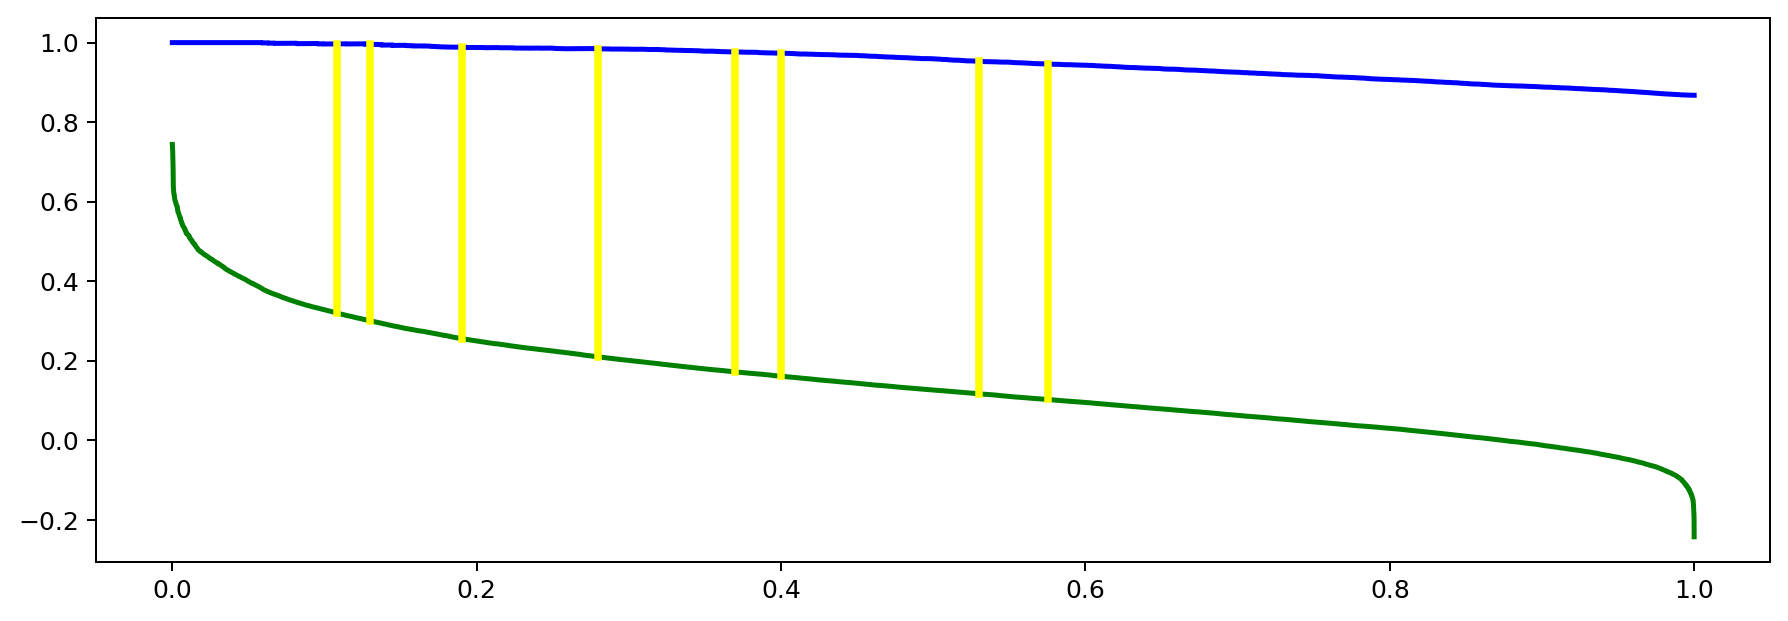

In [15]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(12,4), dpi=180)
ax.plot(data_perc_vec, pred_cumsum, lw=2, label='accuracy', color='blue', ls='-', zorder=0)
ax.plot(data_perc_vec, sample_silhouette_values_sorted, lw=2, label='accuracy', color='green', ls='-', zorder=1)
max_idx = get_max_idx(sample_silhouette_values_sorted)
for _x_ in max_idx:
    _xn = _x_/len(pred_cumsum)
    print(_x_, sample_silhouette_values_sorted[_x_],sample_silhouette_values_sorted[_x_+1])
    ac_at = pred_cumsum[_x_]
    ax.plot(np.asarray([_xn, _xn]), np.asarray([sample_silhouette_values_sorted[_x_], ac_at]), lw=3,
                color='yellow', ls='-', zorder=2)

In [ ]:
print(sample_silhouette_values_sorted)
print(sample_silhouette_values_sorted.shape)
print(type(sample_silhouette_values_sorted))

In [ ]:
from scipy.interpolate import InterpolatedUnivariateSpline
spl = InterpolatedUnivariateSpline(data_perc_vec, sample_silhouette_values_sorted)
print(spl)
spl.get_residual()

In [ ]:
plt.plot(data_perc_vec, spl(data_perc_vec), 'g', lw=3, alpha=0.7)
plt.show()

In [ ]:
for key, value in result_dict.items() :
    print (key)

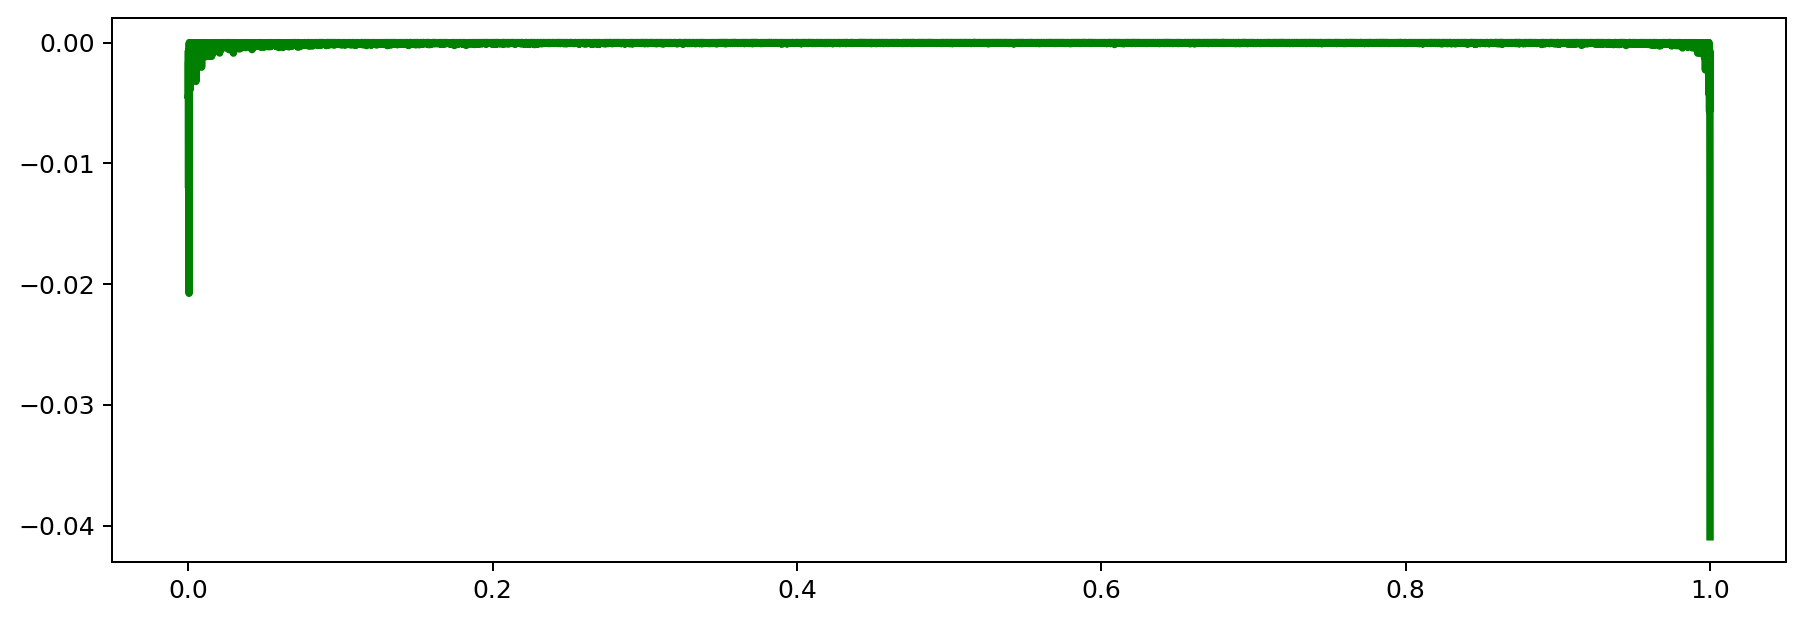

In [11]:
_xv_ = sample_silhouette_values_sorted.copy()
z1 = _xv_[1:]-_xv_[:-1]
z2 = z1[1:]-z1[:-1]
plt.close('all')
fig, ax = plt.subplots(1, figsize=(12,4), dpi=180)
#ax.plot(data_perc_vec[0:], _xv_, lw=4, label='accuracy', color='red', ls='-', zorder=0)
ax.plot(data_perc_vec[1:], z1, lw=3, label='accuracy', color='green', ls='-', zorder=0)
#ax.plot(data_perc_vec[2:], z2, lw=1, label='accuracy', color='blue', ls='-', zorder=0)
plt.show()

In [106]:
import torch
import os
import helperFuncs as funcH
from pandas import DataFrame as pd_df
from sklearn.metrics import confusion_matrix
figsize=(8,3) 
dpi=360

def update_centroid_df(centroid_df, cluster_ids):
    uq_pr = np.unique(cluster_ids)
    num_of_samples = []
    for i in range(len(uq_pr)):
        cluster_id = uq_pr[i]
        cluster_inds = funcH.getInds(cluster_ids, i)
        num_of_samples.append(len(cluster_inds))
    centroid_df['num_of_samples'] = num_of_samples
    return centroid_df
def analyze_correspondance_results(correspondance_tuple, centroid_df, pred_vec, lab_vec):
    df = pd_df({'labels': lab_vec[np.asarray(centroid_df['sampleID'], dtype=int)],
                'klusterID': np.asarray(centroid_df['klusterID'], dtype=int),
                'sampleCounts': np.asarray(centroid_df['num_of_samples'], dtype=int)})
    print('correspondance results:')
    print(df.groupby(['labels'])[['labels', 'sampleCounts']].sum())
    corr_in_clust = pred_vec[correspondance_tuple[0]]
    corr_ou_clust = pred_vec[correspondance_tuple[1]]
    _confMat_corr_preds = confusion_matrix(corr_in_clust, corr_ou_clust)
    acc_corr_preds = 100 * np.sum(np.diag(_confMat_corr_preds)) / np.sum(
        np.sum(_confMat_corr_preds))
    print("_confMat_corr_preds - acc({:6.4f})".format(acc_corr_preds))

    corr_in_labels = lab_vec[correspondance_tuple[0]]
    corr_ou_labels = lab_vec[correspondance_tuple[1]]
    _confMat_corr = confusion_matrix(corr_in_labels, corr_ou_labels)
    acc_corr = 100 * np.sum(np.diag(_confMat_corr)) / np.sum(np.sum(_confMat_corr))
    print("confMat - acc({:6.4f}), correspondance match:\n".format(acc_corr), pd_df(_confMat_corr))
    
def map_predictions(real_labels, cluster_labels, centroid_info_pdf=None):
    _confMat, kluster2Classes, kr_pdf, _, _ = funcH.countPredictionsForConfusionMat(real_labels, cluster_labels, centroid_info_pdf=centroid_info_pdf)
    mapped_class_vec = np.array(kluster2Classes)[:, 1].squeeze()
    predictions_mapped, mappedKlustersSampleCnt = funcH.getMappedKlusters(cluster_labels, mapped_class_vec)
    return predictions_mapped  
def _cumsum_preds(labs, preds, idx):
    pred_sorted = preds[idx]
    labs_sorted = labs[idx]
    all_ones = np.ones(preds.shape)
    pred_cumsum = np.cumsum(pred_sorted == labs_sorted) / np.cumsum(all_ones)
    return pred_cumsum

def f(tuple_score_sum, lab_vec, cor_tup, sort_ascend=False, _def_str="ds"):
    sort_mul = 2*(float(sort_ascend)-0.5)
    tuple_idx = np.argsort(sort_mul*tuple_score_sum)
    tup_sor_a_idx = cor_tup[0][tuple_idx]
    tup_sor_b_idx = cor_tup[1][tuple_idx]
    lab_vec_a = lab_vec[tup_sor_a_idx]
    lab_vec_b = lab_vec[tup_sor_b_idx]
    _cn_a = []
    _cn_b = []
    uniq_class_cnt_perc_a = np.zeros(lab_vec_a.shape, dtype=float)
    uniq_class_cnt_perc_b = np.zeros(lab_vec_b.shape, dtype=float)
    n = len(lab_vec)
    for i in range(n):
        if lab_vec_a[i] not in _cn_a:
            _cn_a.append(lab_vec_a[i])
        if lab_vec_b[i] not in _cn_b:
            _cn_b.append(lab_vec_b[i])
        uniq_class_cnt_perc_a[i] = len(_cn_a)
        uniq_class_cnt_perc_b[i] = len(_cn_b)
    print("general_acc_for("+_def_str+"):", np.sum(lab_vec_a==lab_vec_b)/len(lab_vec_a))
    pred_cumsum = np.cumsum(lab_vec_a == lab_vec_b) / np.cumsum(lab_vec_b==lab_vec_b)
    max_run_acc_idx = np.argmax(pred_cumsum)
    max_run_acc = pred_cumsum[max_run_acc_idx]
    print("max_run_acc({:6.4f}), at {:d}(%{:4.2f})".format(max_run_acc, max_run_acc_idx, max_run_acc_idx/n))
    
    cnt_lab_uniq = len(np.unique(lab_vec))
    cpa = uniq_class_cnt_perc_a/cnt_lab_uniq
    cpb = uniq_class_cnt_perc_b/cnt_lab_uniq
    print(cpa)
    
    return pred_cumsum, tuple_score_sum[tuple_idx], cpa, cpb

def pl_01(sil_sort_pred_cumsum, sil_tup_sum_sorted, cpa_sil, cpb_sil, _s='sil_'):
    data_perc_vec = np.arange(0, len(sil_sort_pred_cumsum)) / len(sil_sort_pred_cumsum)
    sil_tup_sum_sorted_n = funcH.map_0_1(sil_tup_sum_sorted)
    plt.close('all')
    fig, ax = plt.subplots(1, figsize=figsize, dpi=dpi)
    ax.plot(data_perc_vec, sil_sort_pred_cumsum, lw=2, label=_s+'sort', color='blue', ls='-', zorder=0)
    ax.plot(data_perc_vec, sil_tup_sum_sorted_n, lw=2, label=_s+'tup_sum_sorted', color='cyan', ls='-', zorder=0)
    ax.plot(data_perc_vec, cpa_sil, lw=3, label=_s+'cpa', color='purple', ls='-', zorder=0)
    ax.plot(data_perc_vec, cpb_sil, lw=1, label=_s+'cpb', color='orange', ls='-', zorder=0)
    plt.legend(loc='lower left')    
    plt.show()    

def calc_tup_sc(sil_vals, reconstruction_loss, cor_tup, lab_vec, ep_id=None):
    n = len(sil_vals)
    tuple_sihouette_score_sum = np.asarray([sil_vals[cor_tup[0][i]]+sil_vals[cor_tup[1][i]] for i in range(n)])
    rec_los_0_1 = 1-funcH.map_0_1(reconstruction_loss)
    tuple_rec_score_sum = np.asarray([rec_los_0_1[cor_tup[0][i]]+rec_los_0_1[cor_tup[1][i]] for i in range(n)])
    tuple_sr_score_sum = tuple_sihouette_score_sum+tuple_rec_score_sum
    
    sil_sort_pred_cumsum, sil_tup_sum_sorted, cpa_sil, cpb_sil = f(tuple_sihouette_score_sum, lab_vec, cor_tup, sort_ascend=False, _def_str="sil_sort")
    rec_sort_pred_cumsum, rec_tup_sum_sorted, cpa_rec, cpb_rec = f(tuple_rec_score_sum, lab_vec, cor_tup, sort_ascend=False, _def_str="rec_sort")
    sr_sort_pred_cumsum, sr_tup_sum_sorted, cpa_sr, cpb_sr = f(tuple_sr_score_sum, lab_vec, cor_tup, sort_ascend=False, _def_str="sr_sort")

    pl_01(sil_sort_pred_cumsum, sil_tup_sum_sorted, cpa_sil, cpb_sil, _s='sil_')
    pl_01(rec_sort_pred_cumsum, rec_tup_sum_sorted, cpa_rec, cpb_rec, _s='rec_')
    pl_01(sr_sort_pred_cumsum, sr_tup_sum_sorted, cpa_sr, cpb_sr, _s='sr_')
    
    plt.close('all')
    fig, ax = plt.subplots(1, figsize=figsize, dpi=dpi)
    ax.plot(data_perc_vec, sil_sort_pred_cumsum, lw=1, label='silhouette_sort', color='red', ls='-', zorder=0)
    ax.plot(data_perc_vec, rec_sort_pred_cumsum, lw=1, label='reconstruction_sort', color='blue', ls='-', zorder=0)
    ax.plot(data_perc_vec, sr_sort_pred_cumsum, lw=2, label='sil+rec_sort', color='purple', ls='-', zorder=0)
    ax.set_ylim([0.75, 1.0])
    ax.set_xlim([0.0, 1.0])
    title_str = "minacc({:6.4f}),meanacc({:6.4f})".format(np.min(rec_sort_pred_cumsum),np.mean(rec_sort_pred_cumsum))
    plt.title(title_str)
    plt.legend(loc='lower left')  
    if ep_id is not None:
        min_acc = "{:6.4f}".format(np.min(rec_sort_pred_cumsum))
        exp_fold = "/home/doga/DataFolder/vaesae_experiments_cor/exp_linear_vae_FMNIST_is28_cf530"
        saveFileName = os.path.join(exp_fold, "plots", "compare{:03d}_{}.jpeg".format(ep_id,min_acc)) 
        plt.savefig(saveFileName)
    plt.show()    

21
dict_keys(['epoch0001', 'epoch0003', 'epoch0005', 'epoch0007', 'epoch0009', 'epoch0011', 'epoch0013', 'epoch0015', 'epoch0017', 'epoch0019', 'epoch0021', 'epoch0023', 'epoch0025', 'epoch0027', 'epoch0029', 'epoch0031', 'epoch0033', 'epoch0035', 'epoch0037', 'epoch0039', 'epoch0041'])
epoch0039
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
general_acc_for(sil_sort): 0.828
max_run_acc(1.0000), at 0(%0.00)
[0.1 0.1 0.1 ... 1.  1.  1. ]
general_acc_for(rec_sort): 0.828
max_run_acc(1.0000), at 0(%0.00)
[0.1 0.1 0.1 ... 1.  1.  1. ]
general_acc_for(sr_sort): 0.828
max_run_acc(1.0000), at 0(%0.00)
[0.1 0.1 0.1 ... 1.  1.  1. ]


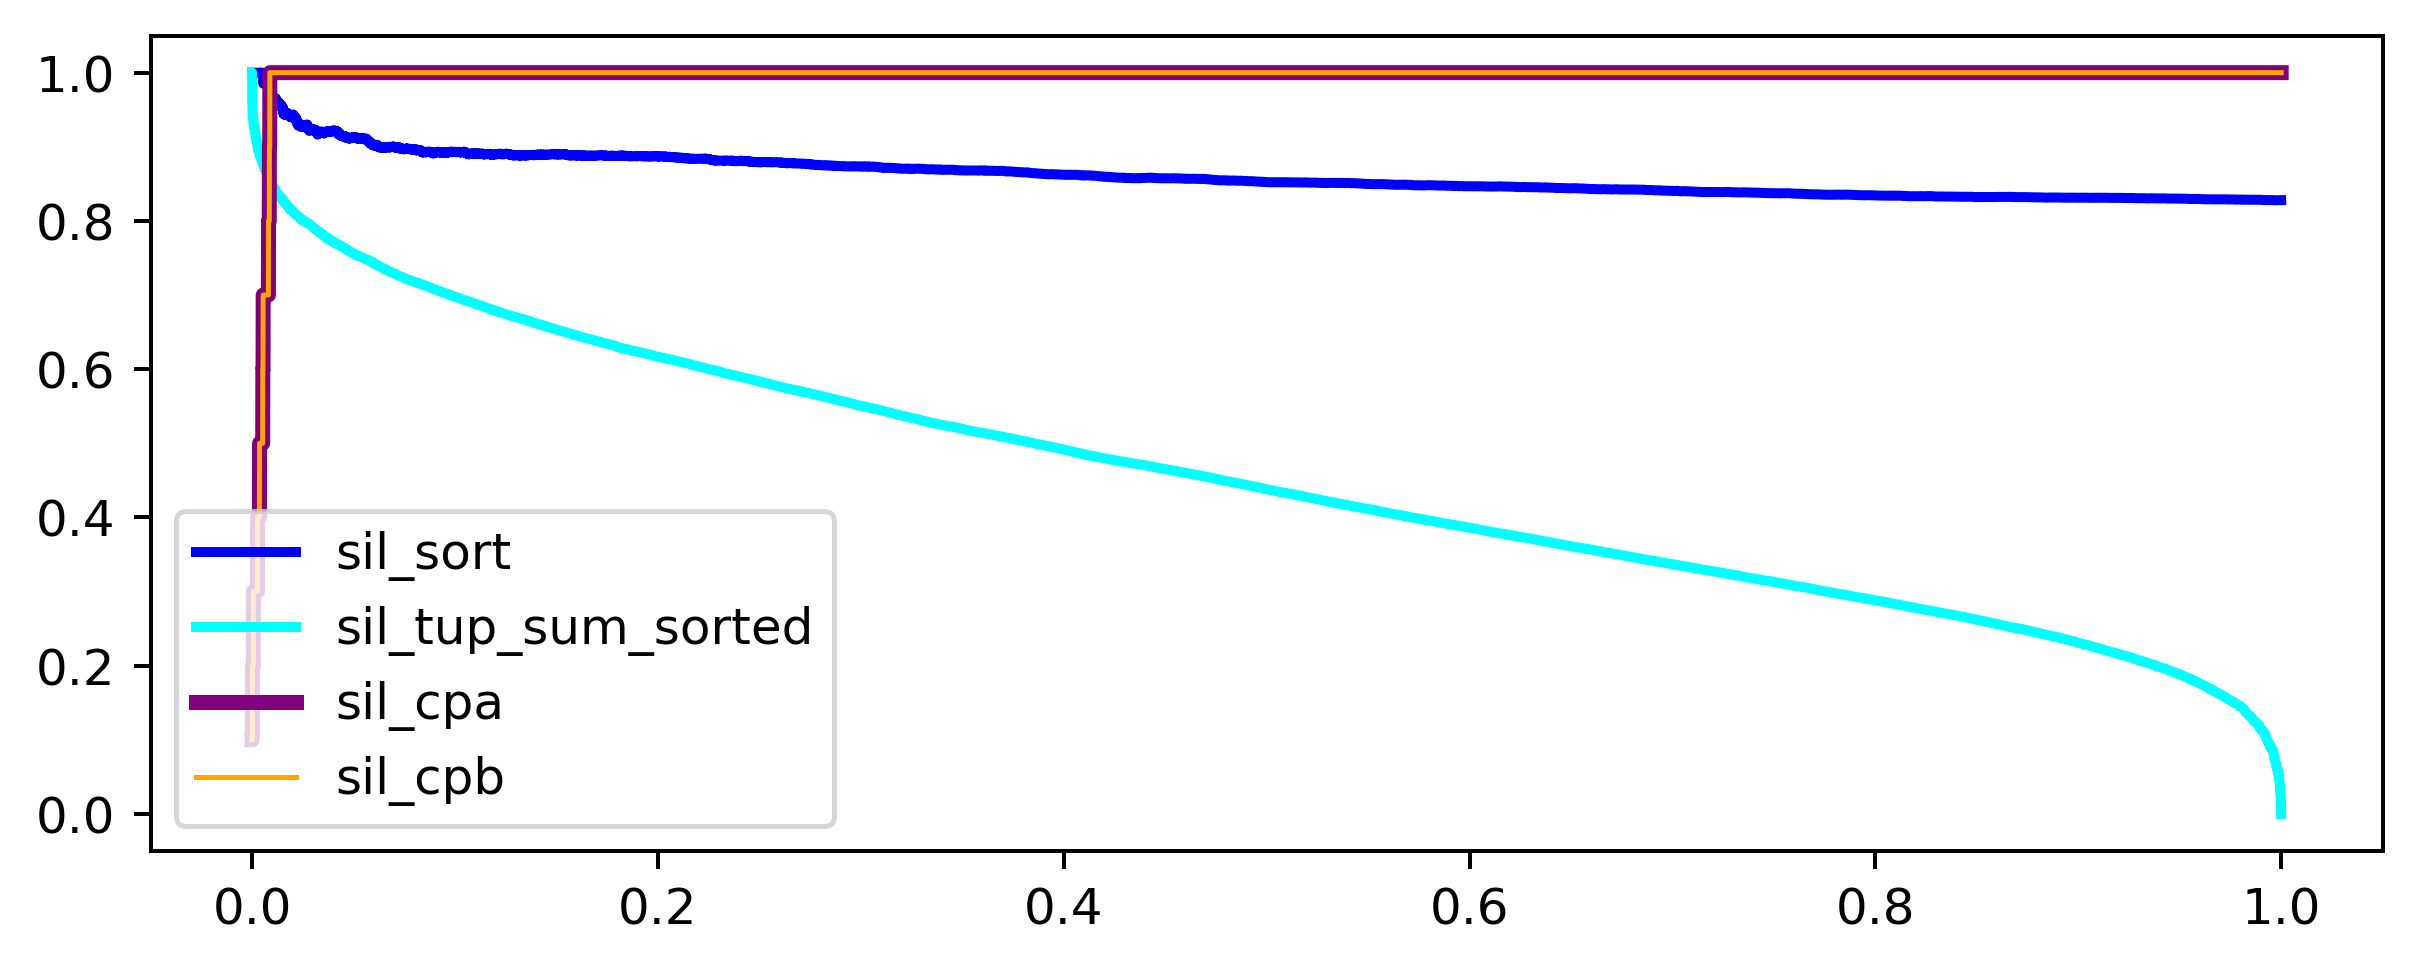

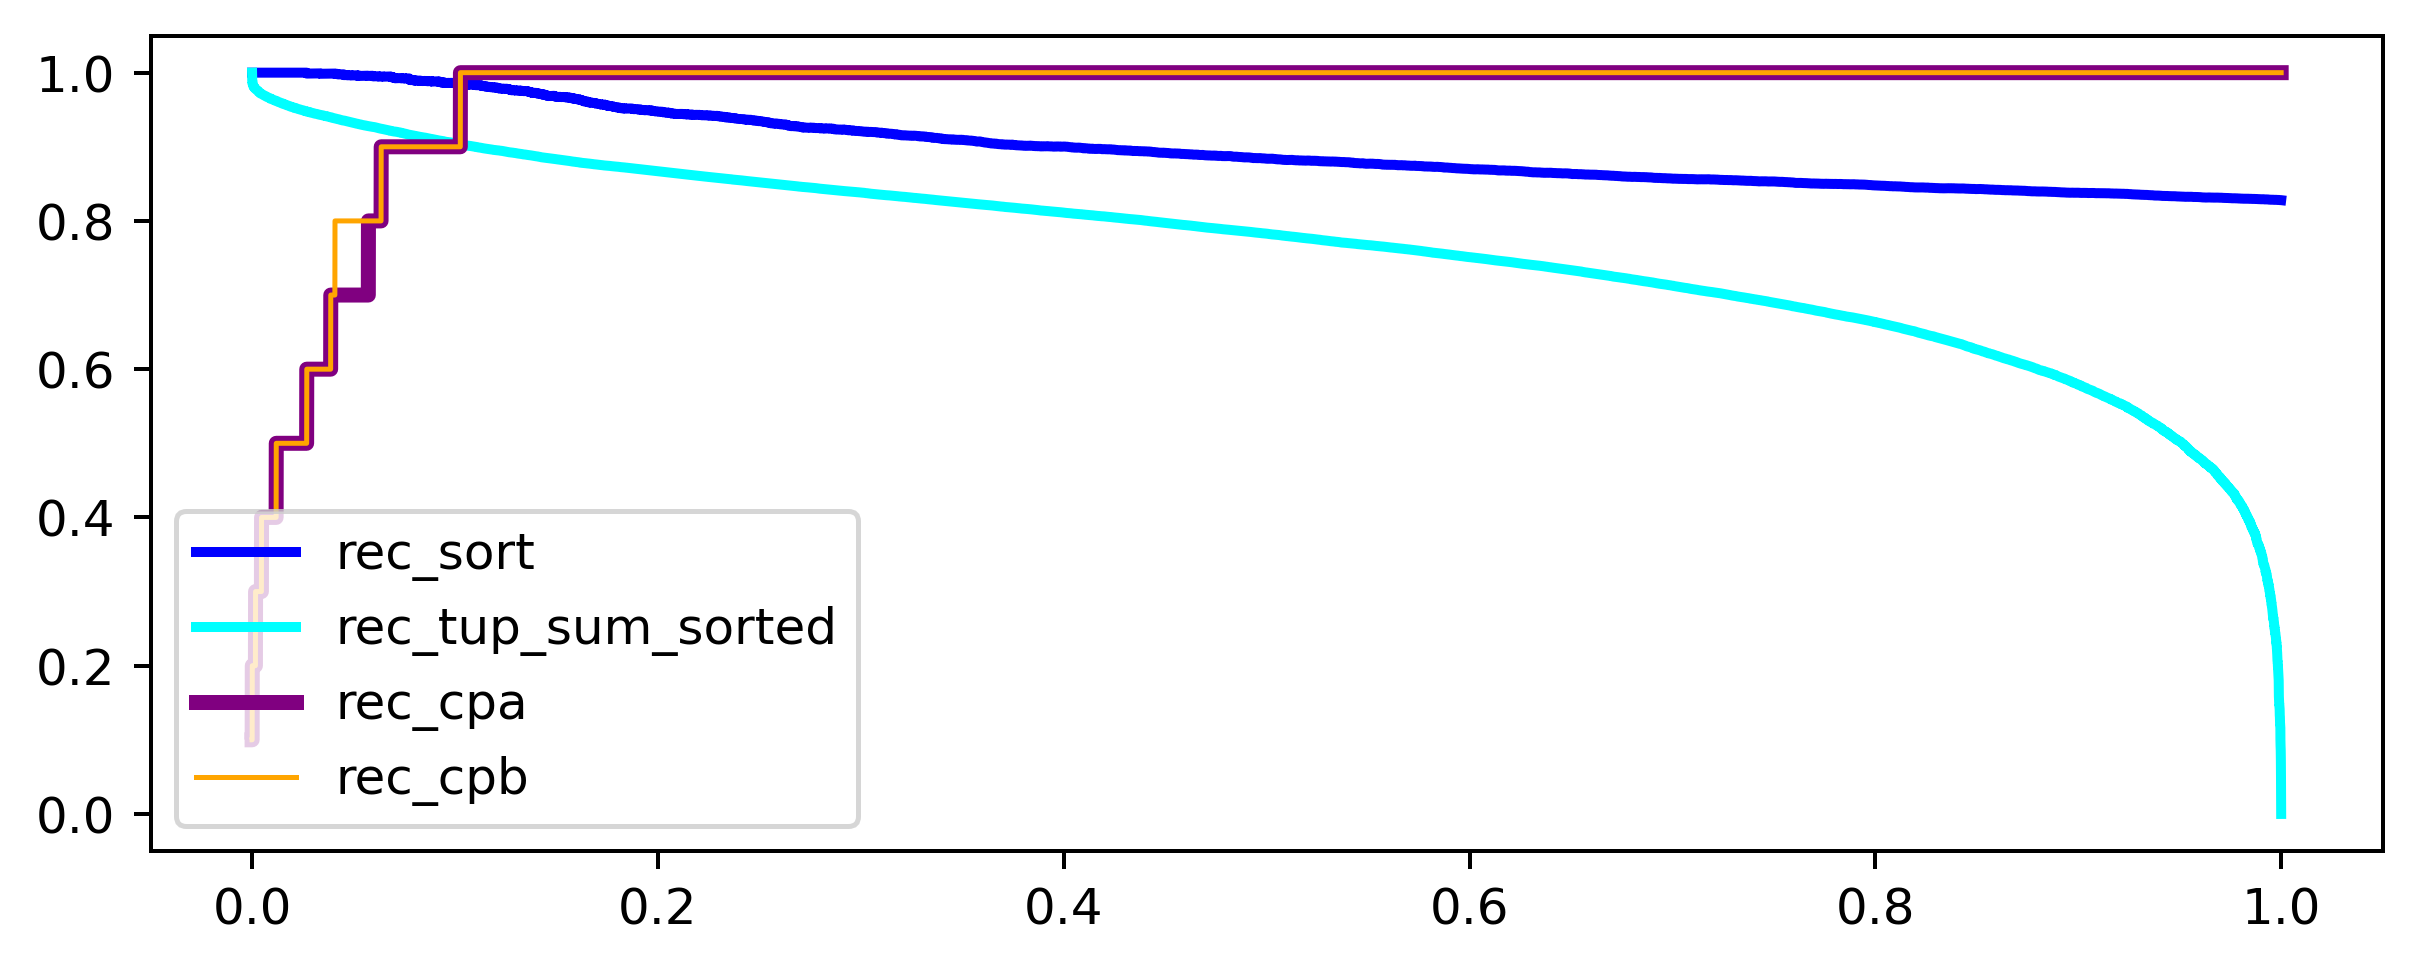

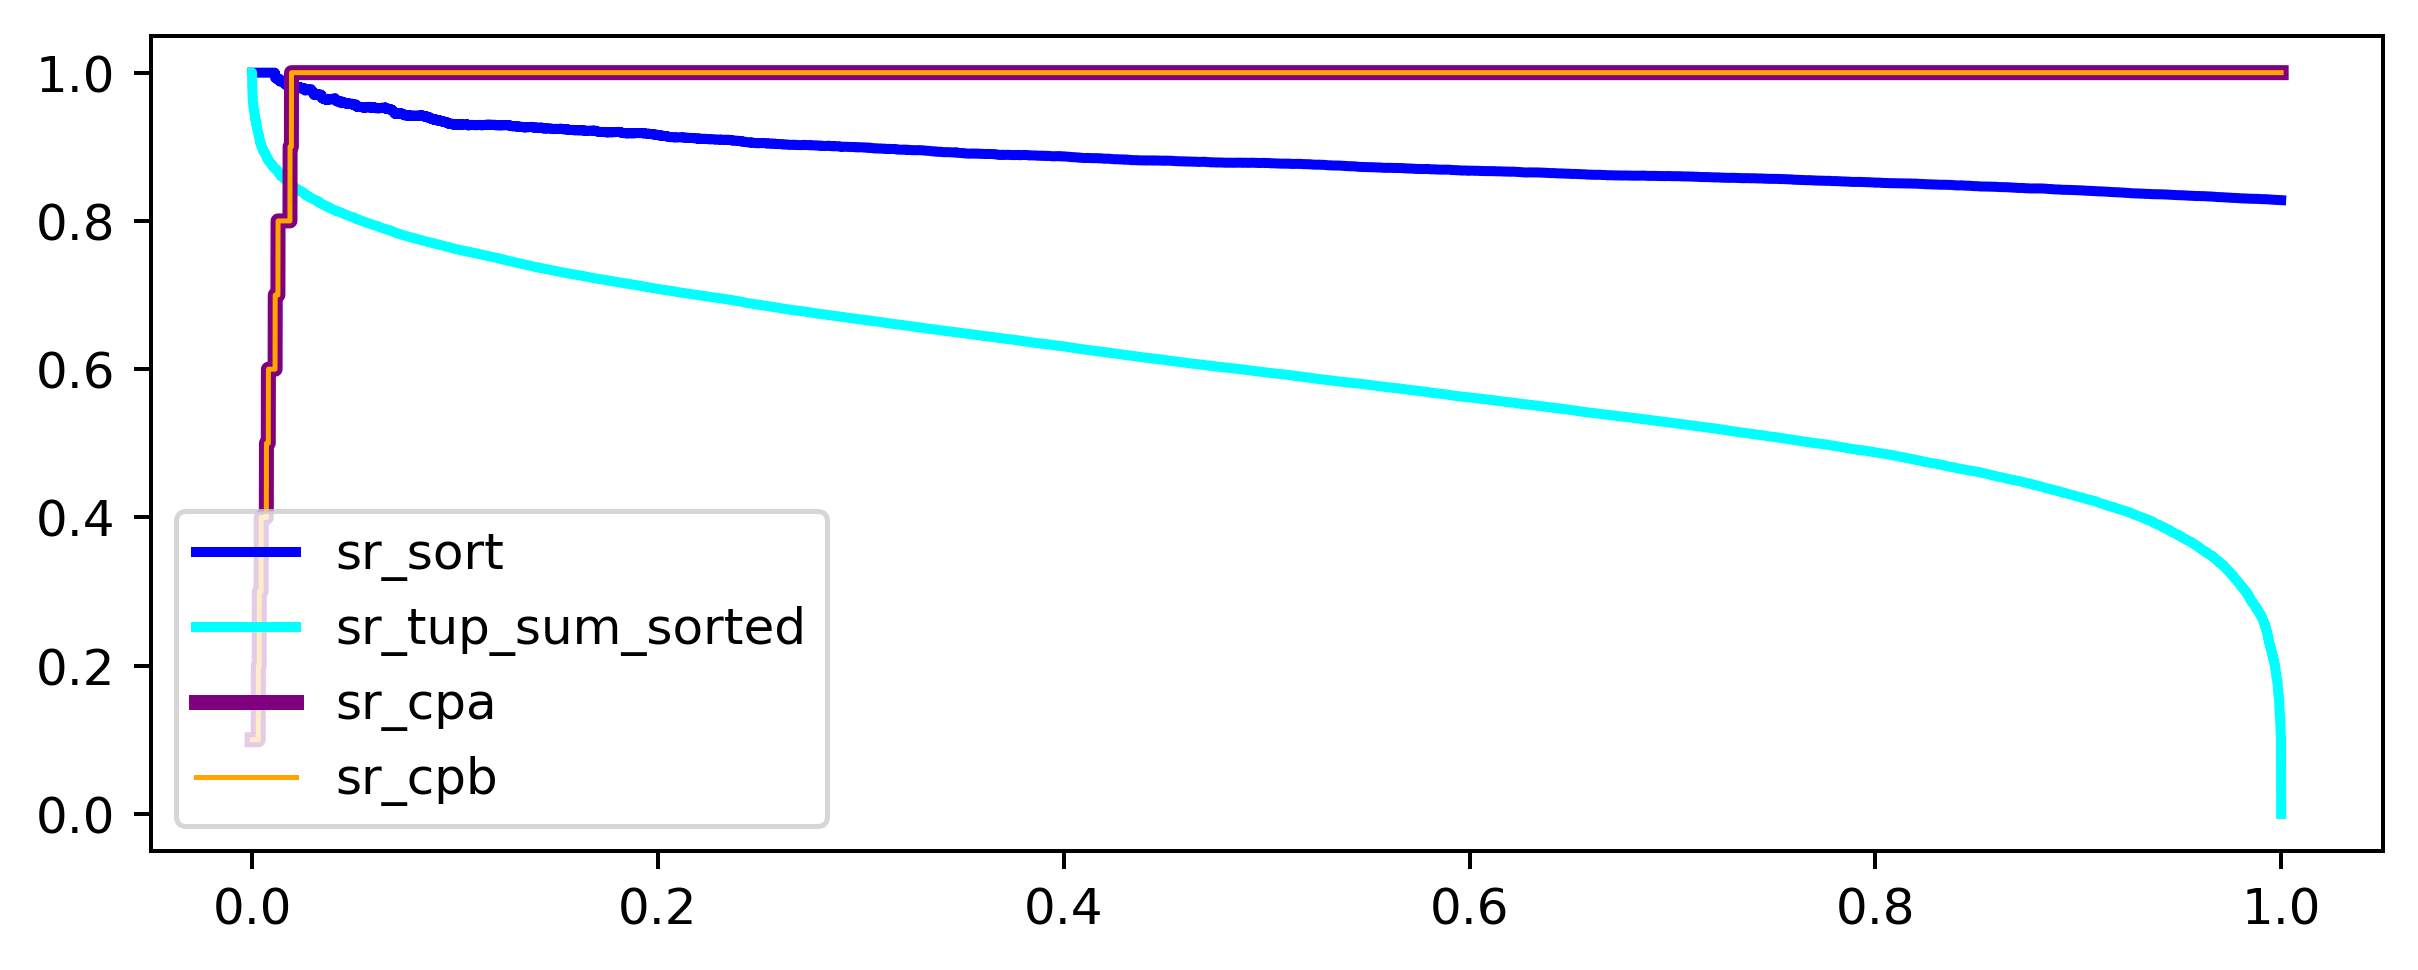

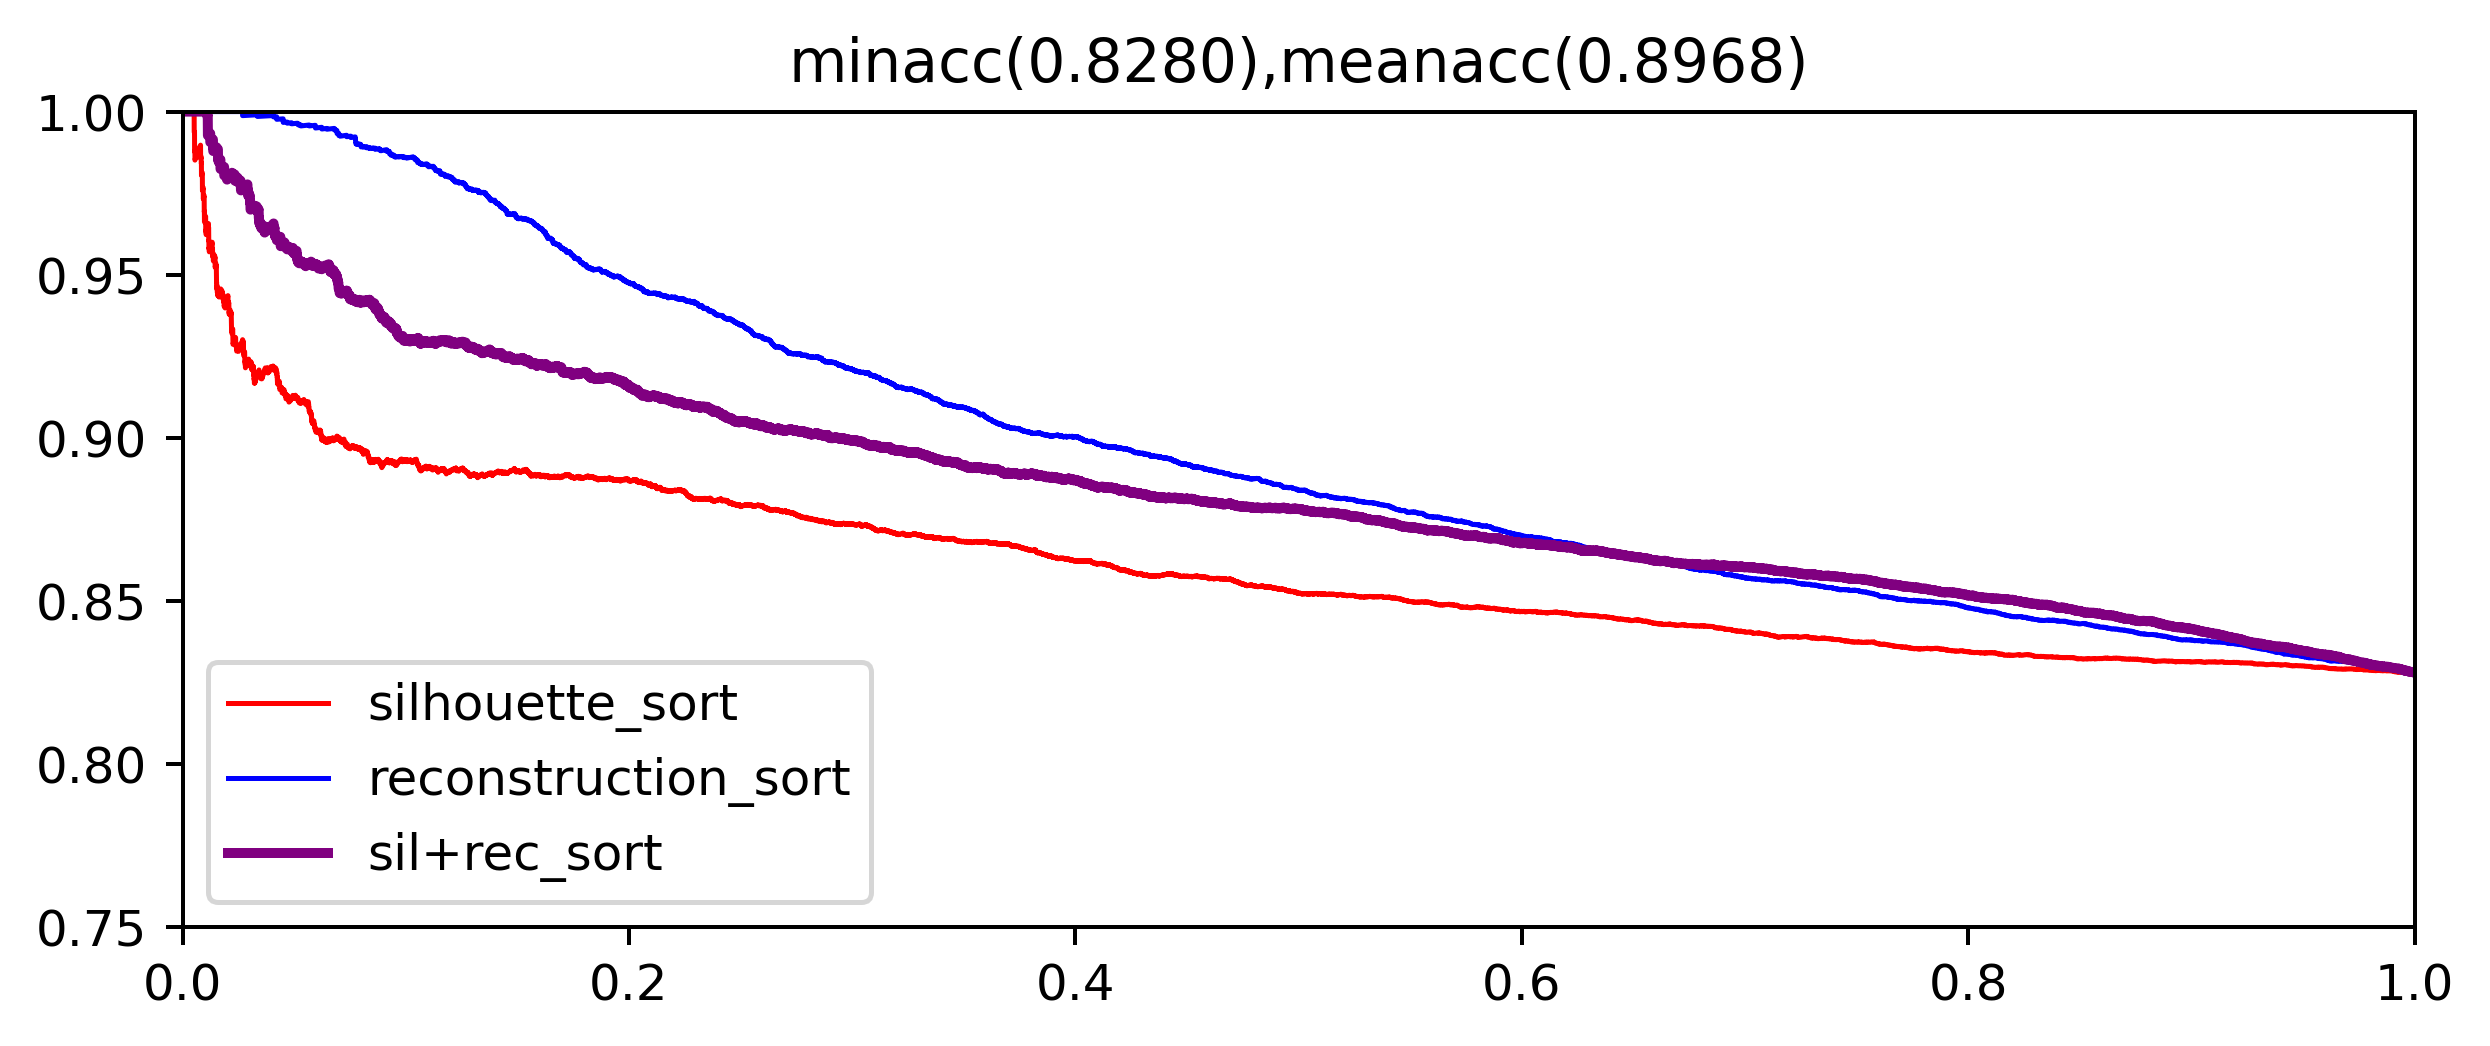

21
dict_keys(['epoch0001', 'epoch0003', 'epoch0005', 'epoch0007', 'epoch0009', 'epoch0011', 'epoch0013', 'epoch0015', 'epoch0017', 'epoch0019', 'epoch0021', 'epoch0023', 'epoch0025', 'epoch0027', 'epoch0029', 'epoch0031', 'epoch0033', 'epoch0035', 'epoch0037', 'epoch0039', 'epoch0041'])
epoch0041
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
general_acc_for(sil_sort): 0.8252
max_run_acc(1.0000), at 0(%0.00)
[0.1 0.1 0.1 ... 1.  1.  1. ]
general_acc_for(rec_sort): 0.8252
max_run_acc(1.0000), at 0(%0.00)
[0.1 0.1 0.1 ... 1.  1.  1. ]
general_acc_for(sr_sort): 0.8252
max_run_acc(1.0000), at 0(%0.00)
[0.1 0.1 0.1 ... 1.  1.  1. ]


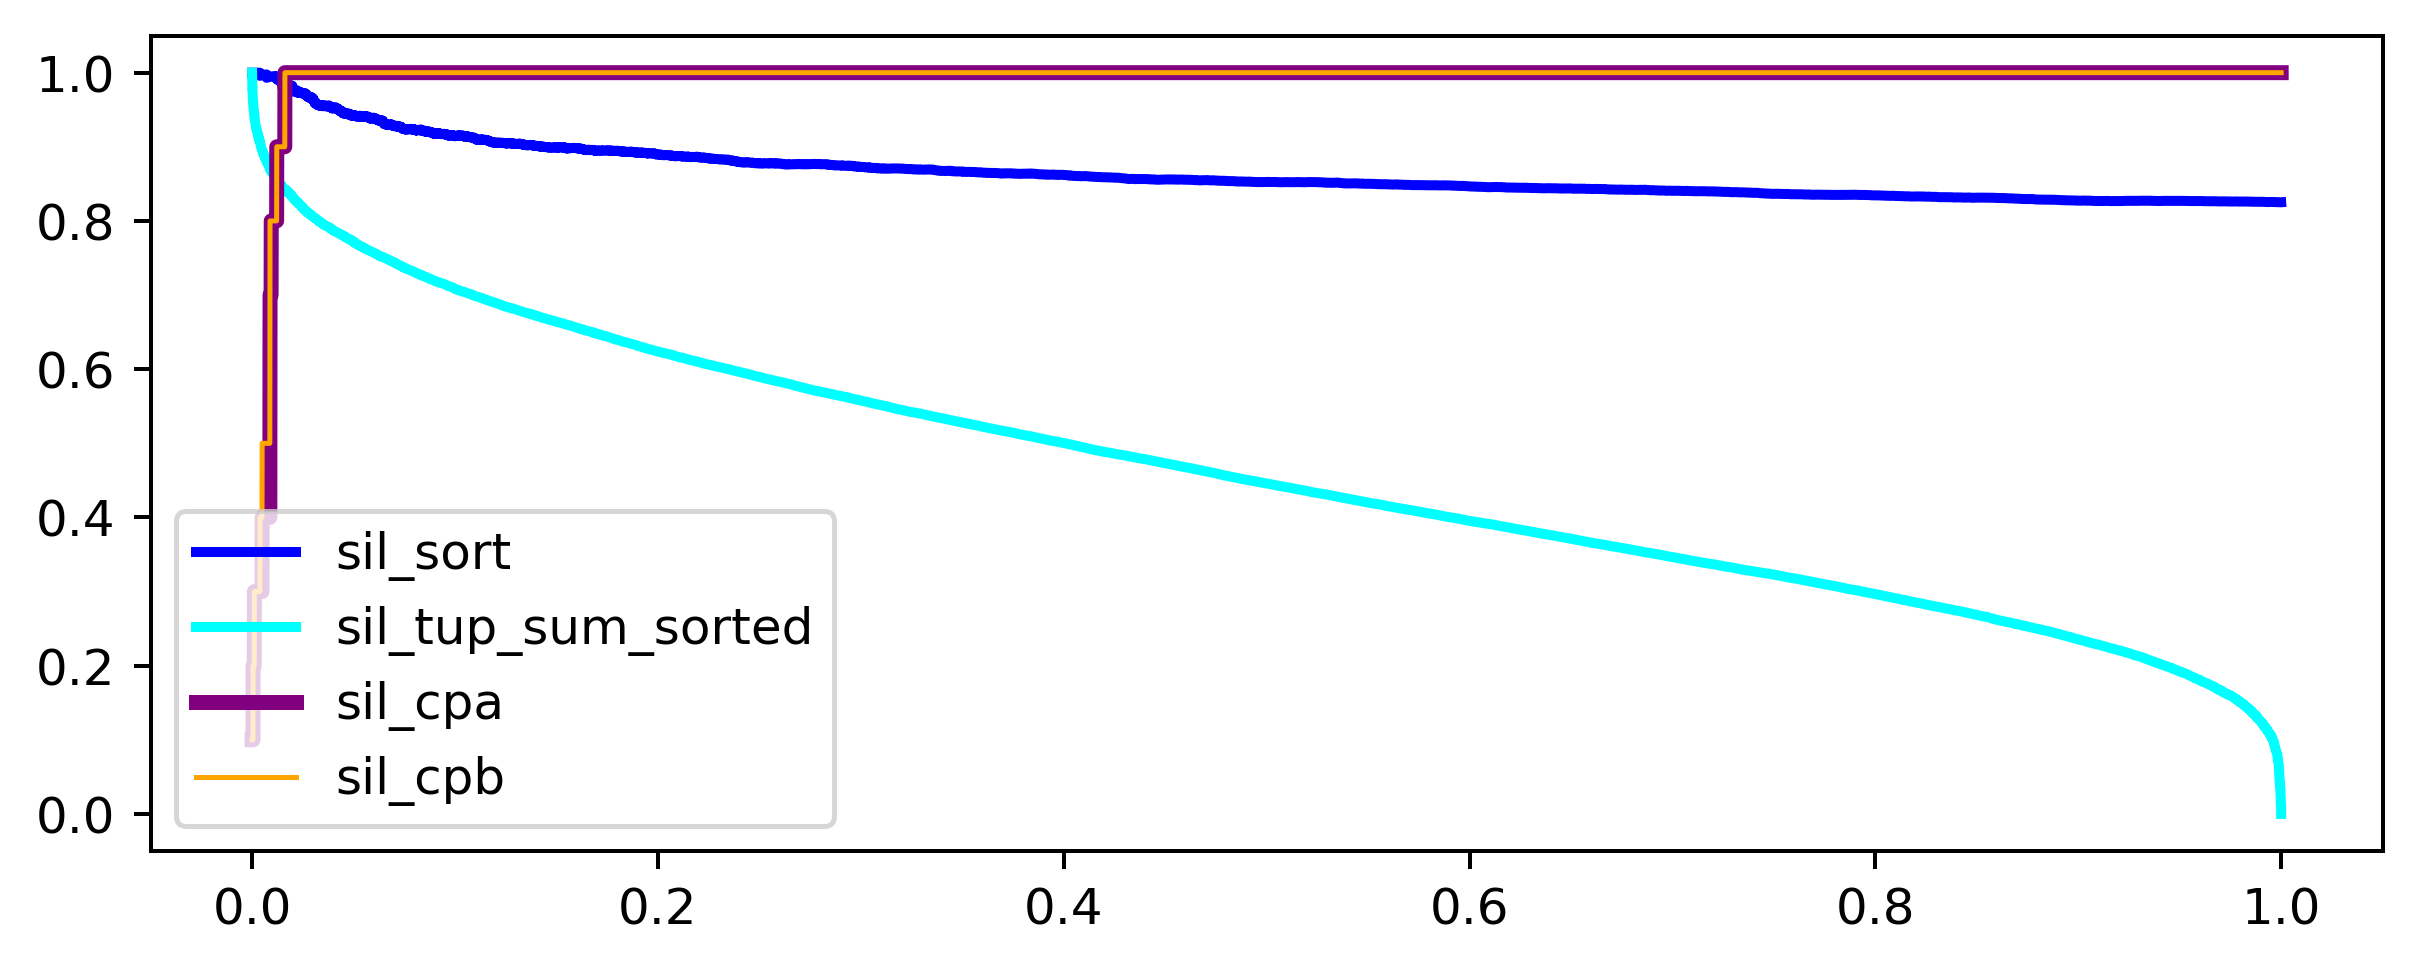

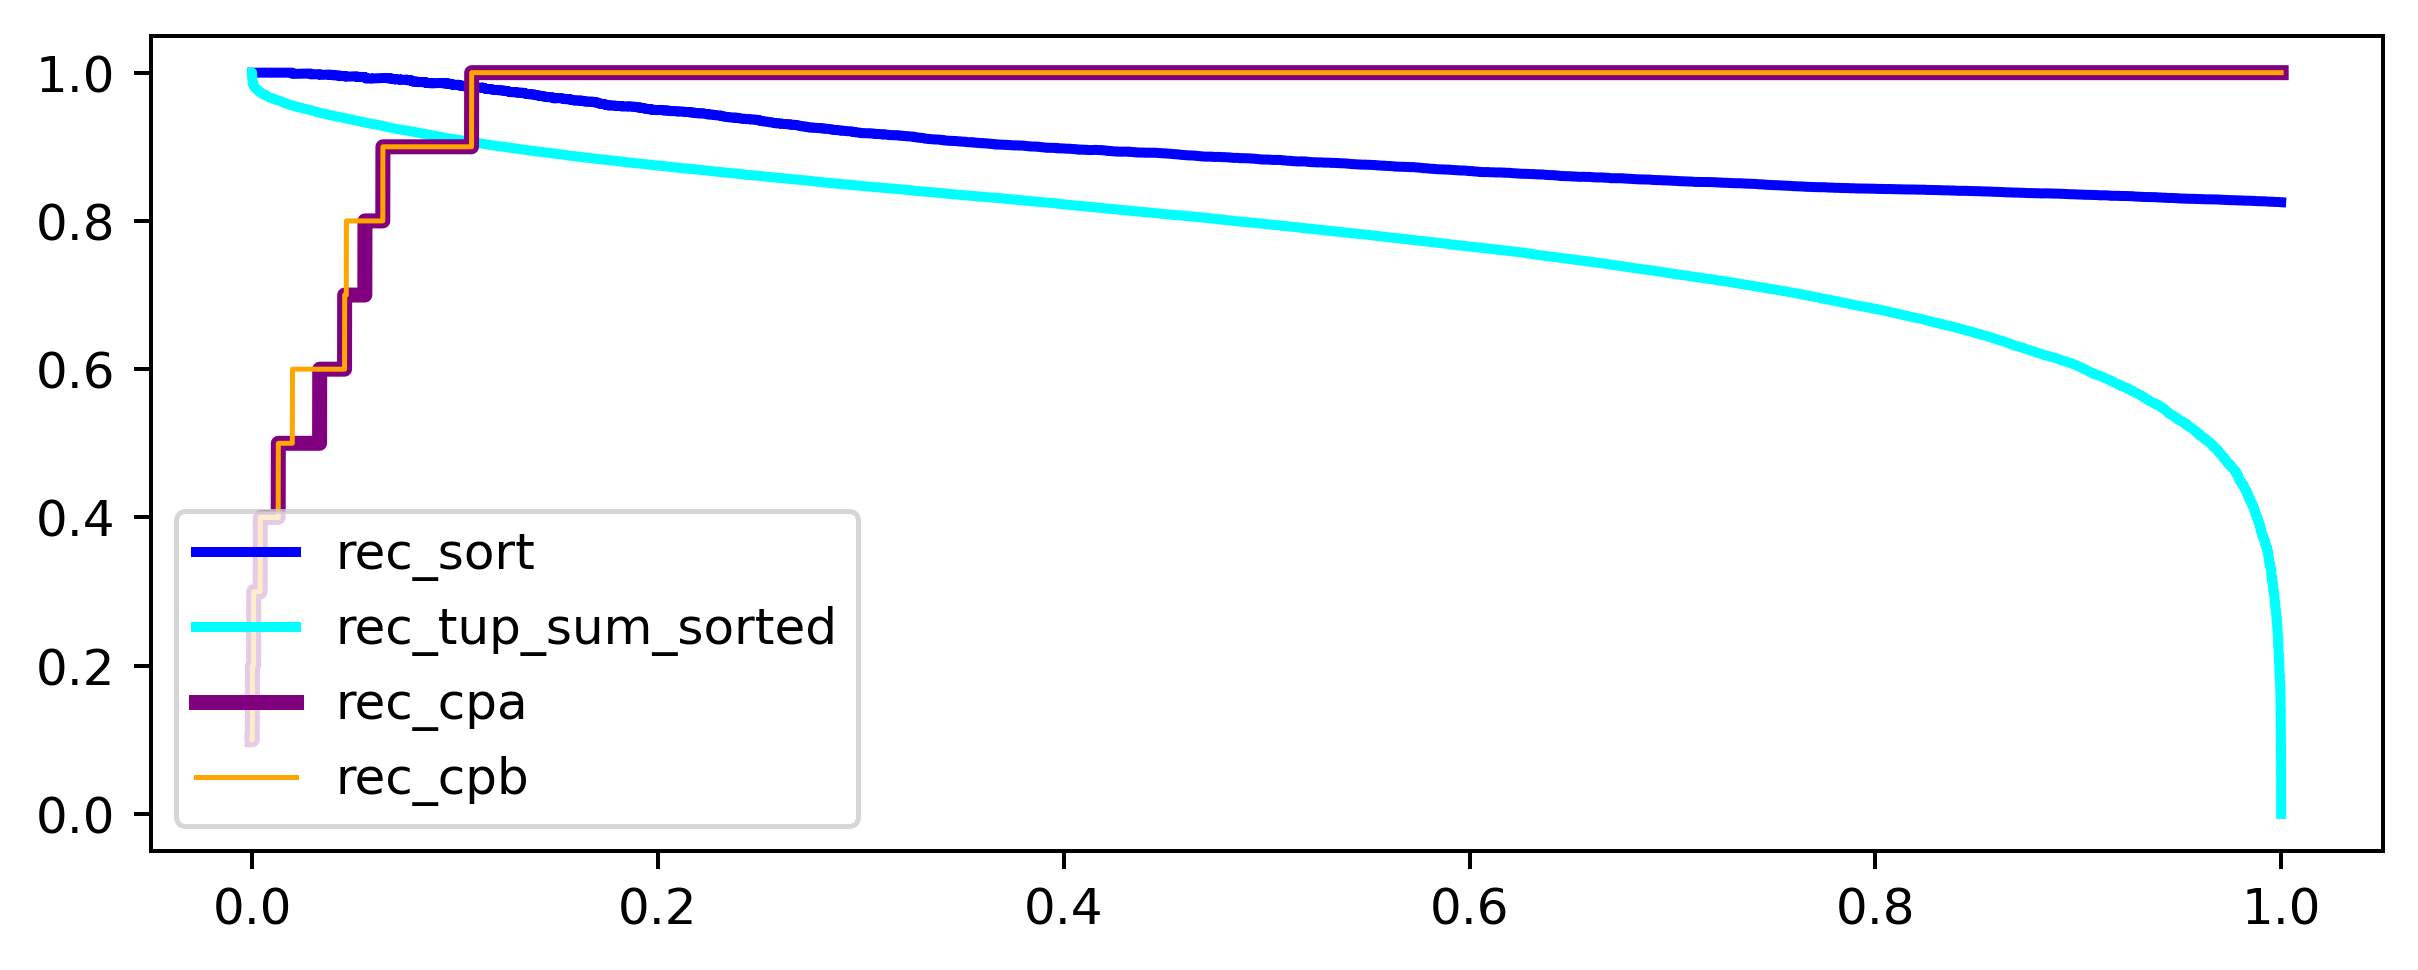

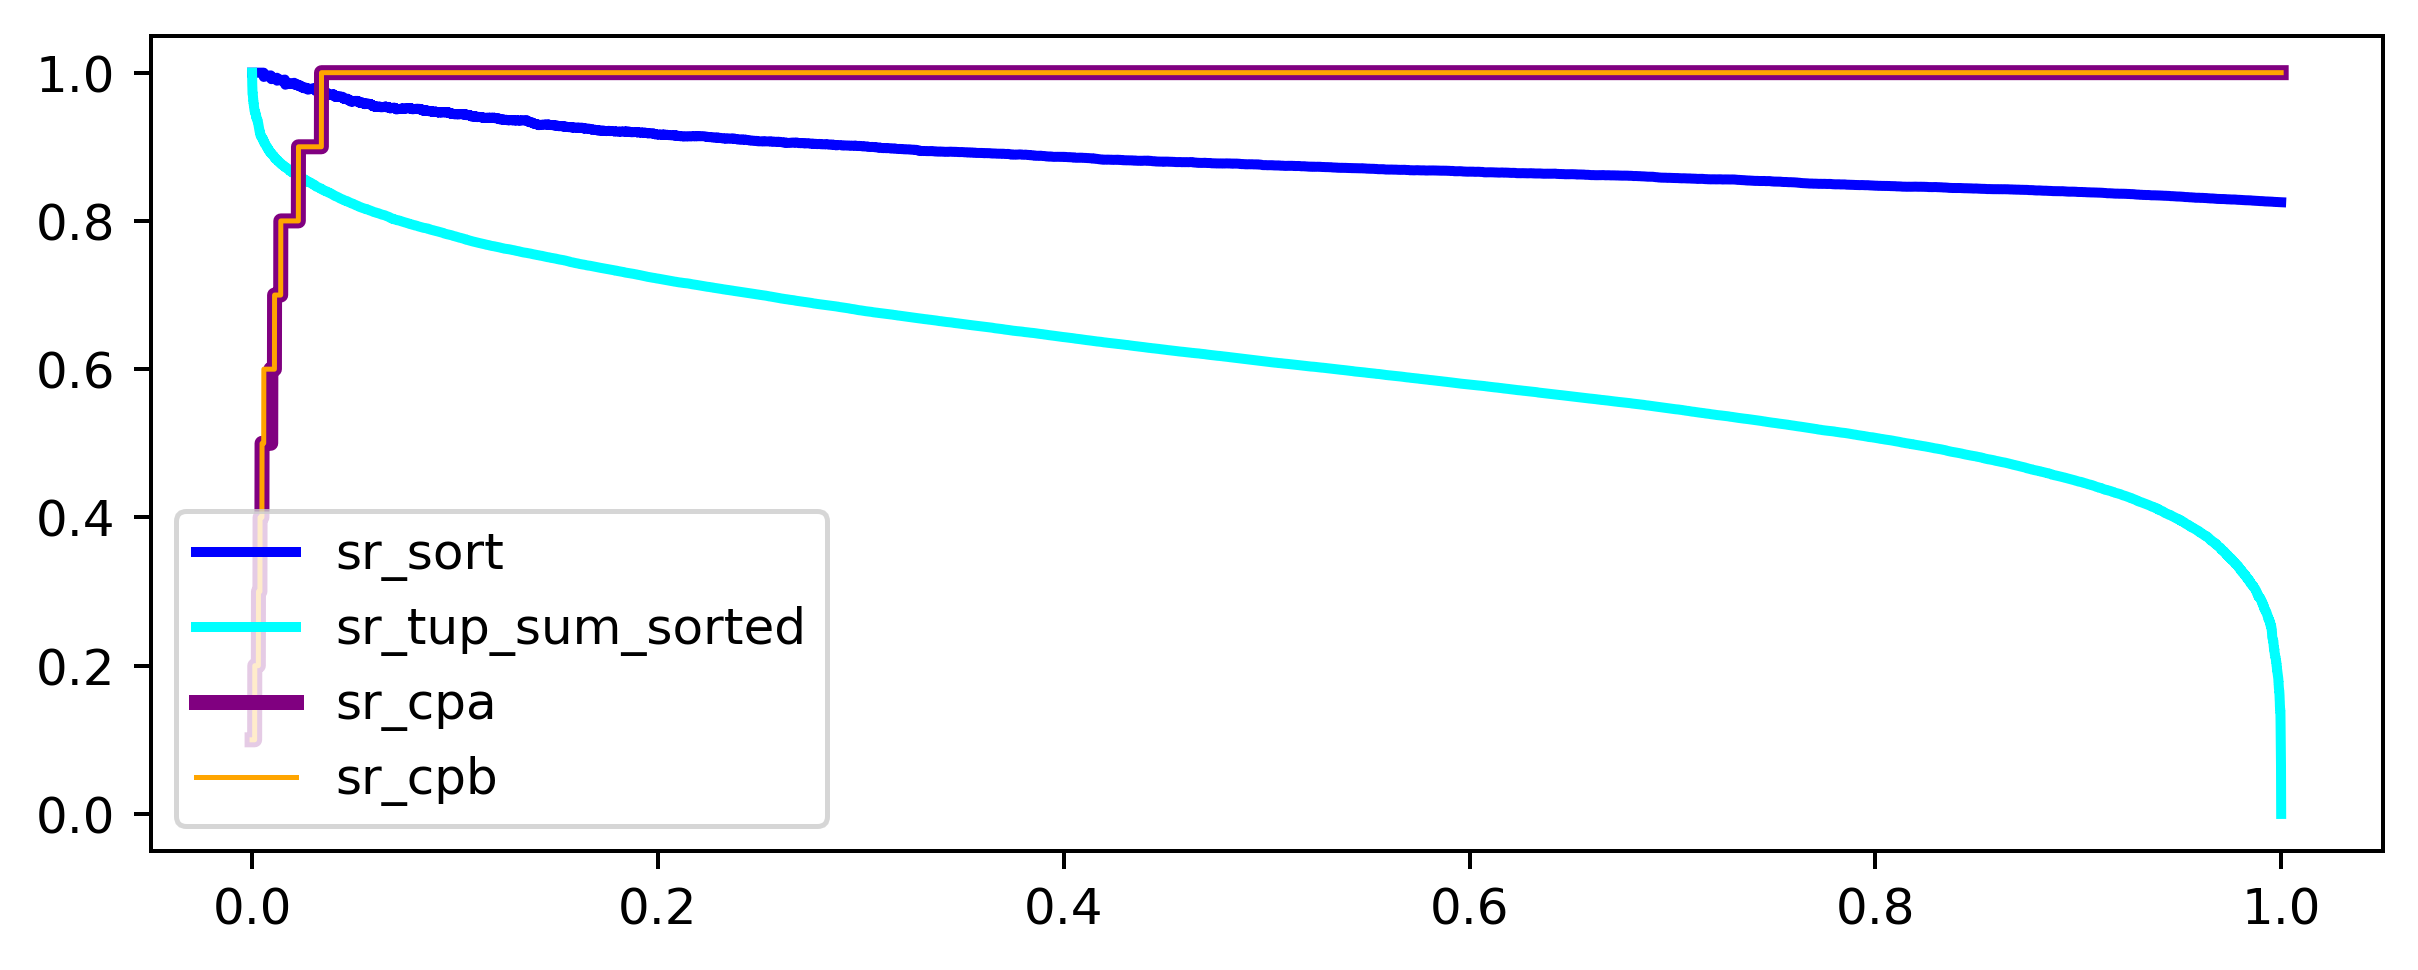

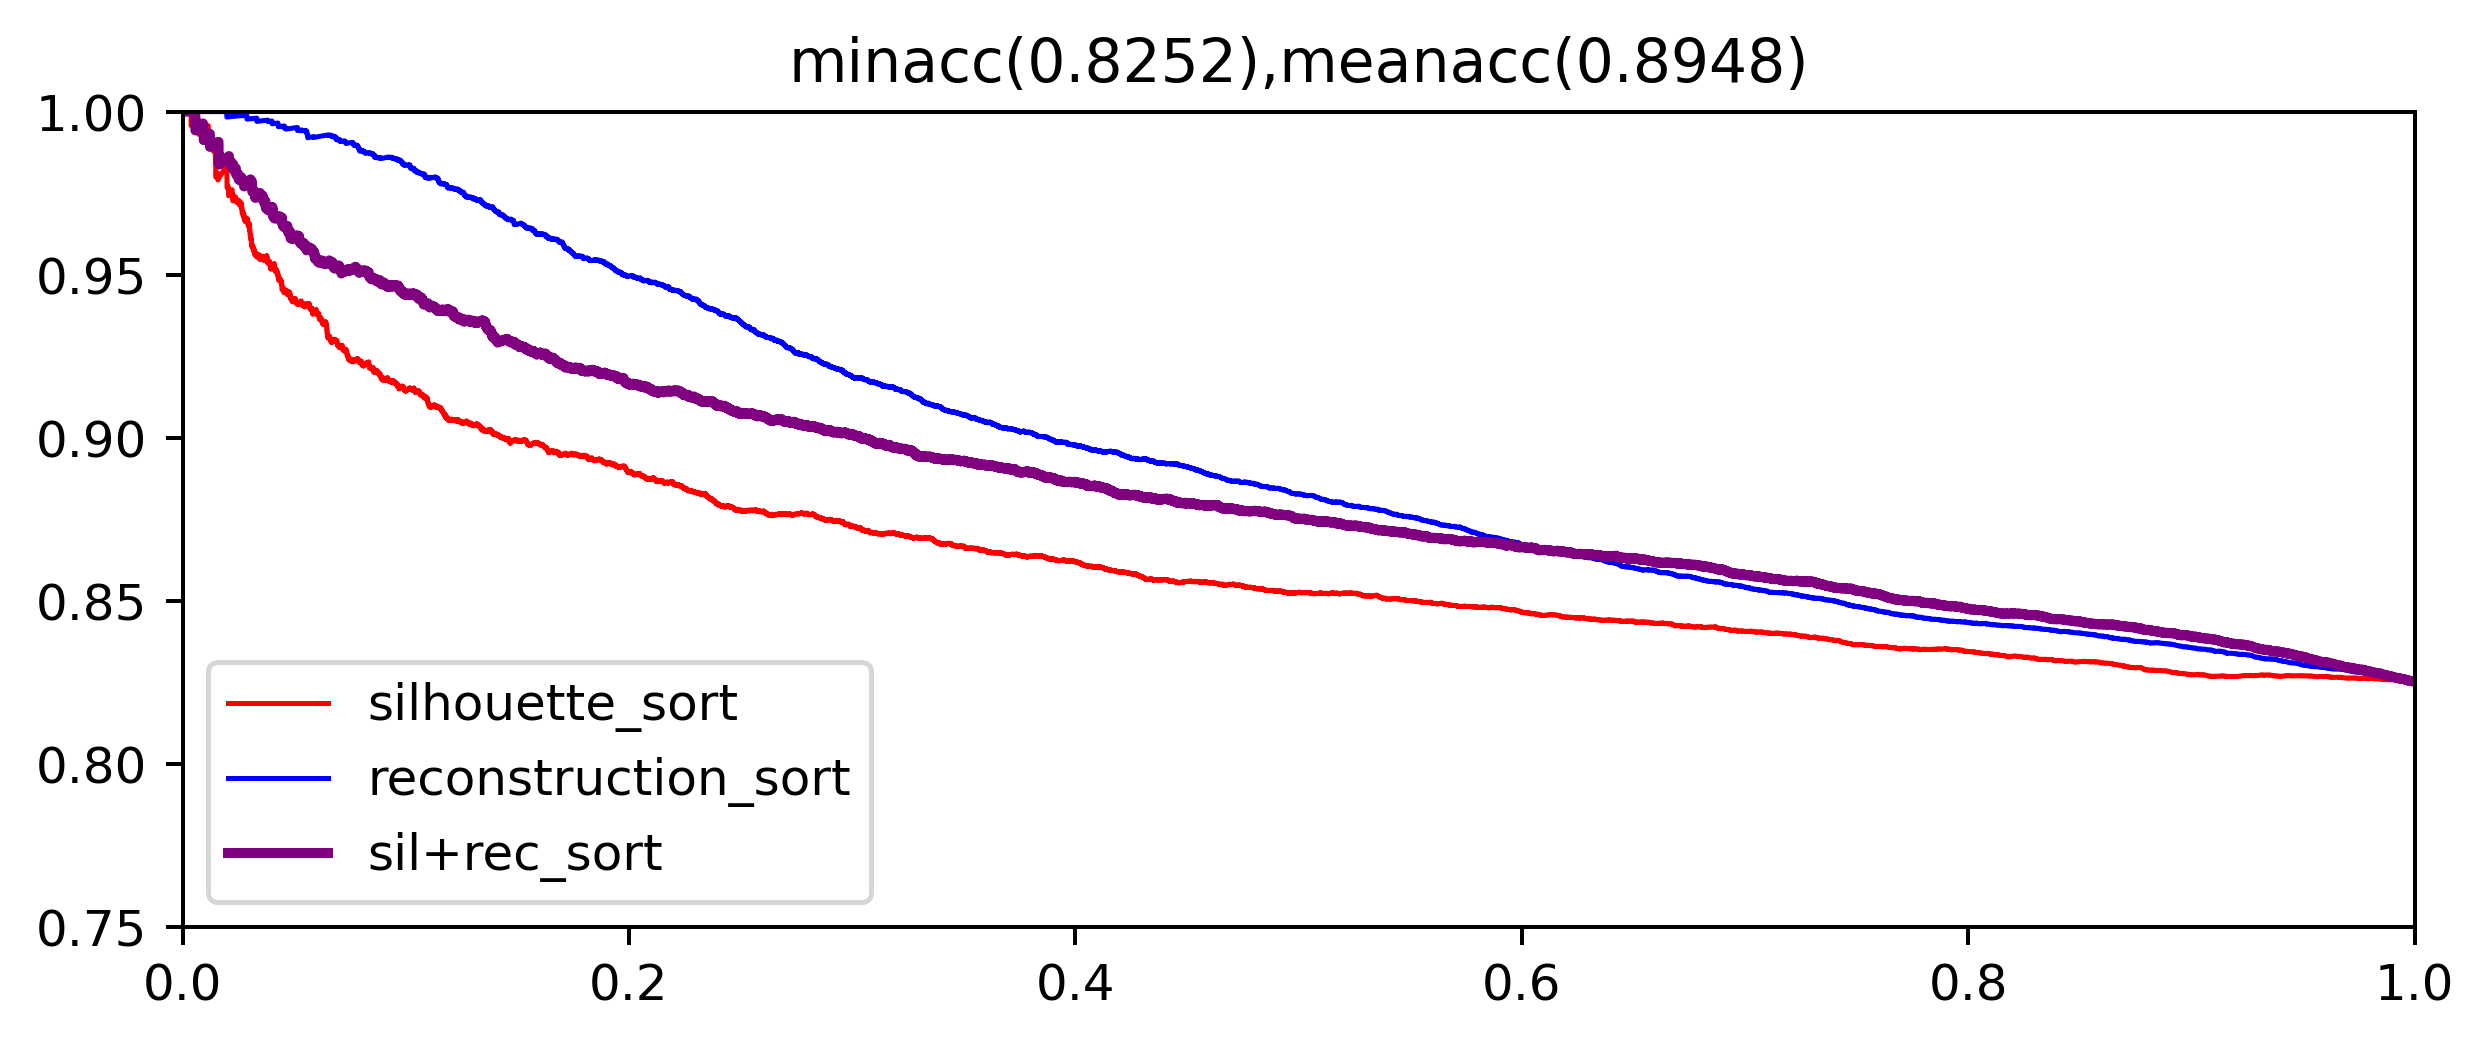

In [109]:
def get_epoch(ep_id):
    exp_fold = "/home/doga/DataFolder/vaesae_experiments_cor/exp_linear_vae_FMNIST_is28_cf530"
    silhouette_reconstruction_sort_file = os.path.join(exp_fold, "silhouette_reconstruction.torch")
    sil_var = torch.load(silhouette_reconstruction_sort_file, map_location=torch.device('cpu'))
    print(len(sil_var))
    print(sil_var.keys())
    ep_str = "epoch{:04d}".format(ep_id)
    print(ep_str)
    #print(sil_var[ep_str])
    print(sil_var[ep_str].keys())
    silhouette_values = sil_var[ep_str]["silhouette_values"]
    silhouette_avg = sil_var[ep_str]["silhouette_avg"]
    reconstruction_loss = sil_var[ep_str]["reconstruction_loss"]
    correspondance_weights = sil_var[ep_str]["correspondance_weights"]
    sil_var[ep_str]["predictions"] = np.asarray(sil_var[ep_str]["predictions"],dtype=int)
    labels = sil_var[ep_str]["labels"]
    correspondance_tuple = sil_var[ep_str]["correspondance_tuple"]
    kluster_centroids = sil_var[ep_str]["kluster_centroids"]
    return sil_var[ep_str]
for ep_id in range(20, 22):
    epoch_id = ep_id*2-1
    _evs = get_epoch(ep_id=epoch_id)
    calc_tup_sc(_evs["silhouette_values"], _evs["reconstruction_loss"], _evs["correspondance_tuple"], _evs["labels"], ep_id=epoch_id)

In [78]:
kluster_centroids = update_centroid_df(_evs["kluster_centroids"], _evs["predictions"])
analyze_correspondance_results(_evs["correspondance_tuple"], _evs["kluster_centroids"], _evs["predictions"], _evs["labels"])

correspondance results:
        labels  sampleCounts
labels                      
0            0          4562
1            3          5009
2            4          4677
3           18          7911
4            8          3773
5           10          3645
6           30         11513
7           21          6712
8           24          4744
9           36          7454
_confMat_corr_preds - acc(100.0000)
confMat - acc(78.8583), correspondance match:
       0      1     2     3     4      5     6      7      8      9
0  9056     85   225   608    80      2  1946      1    107      2
1    85  11320    66   279    29      1    86      1      7      2
2   225     66  7882   151  1894      4  1715      0     92      2
3   608    279   151  9668   663      3   477      0     79      2
4    80     29  1894   663  7694      0  1651      0     68      0
5     2      1     4     3     0  10514     6    660     83    513
6  1946     86  1715   477  1651      6  5908      1    186      1
7     1  

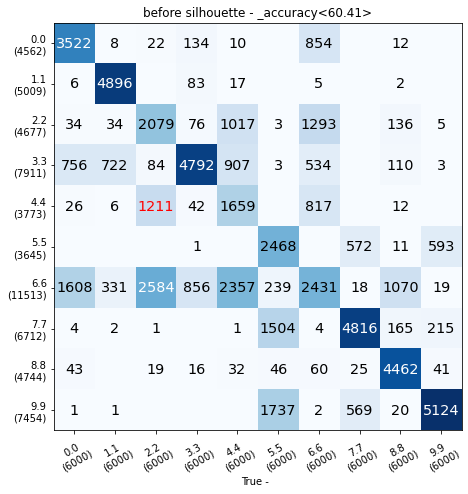

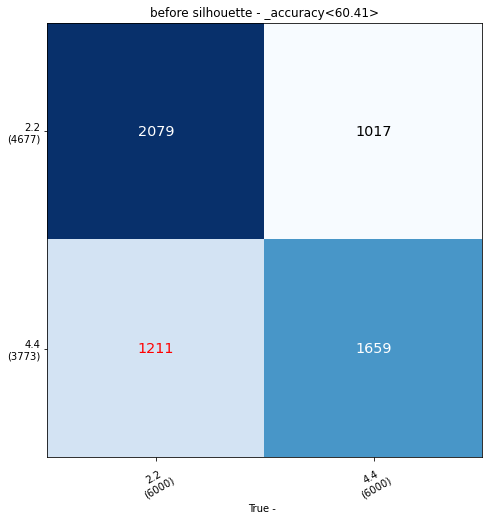

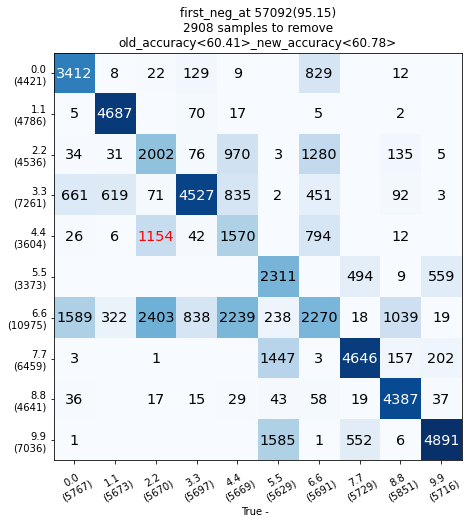

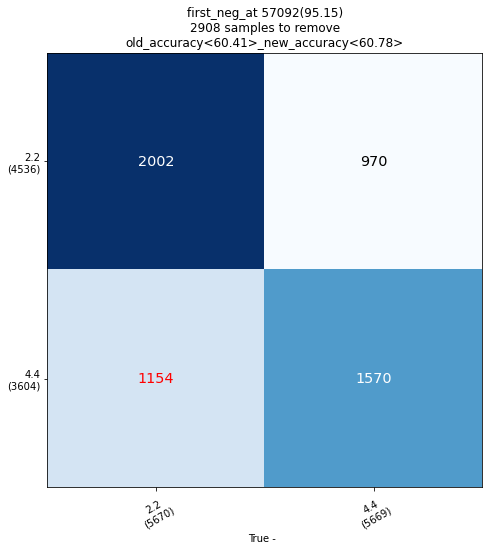

*-*-*
*-*-*
-229.68335 -14.315802


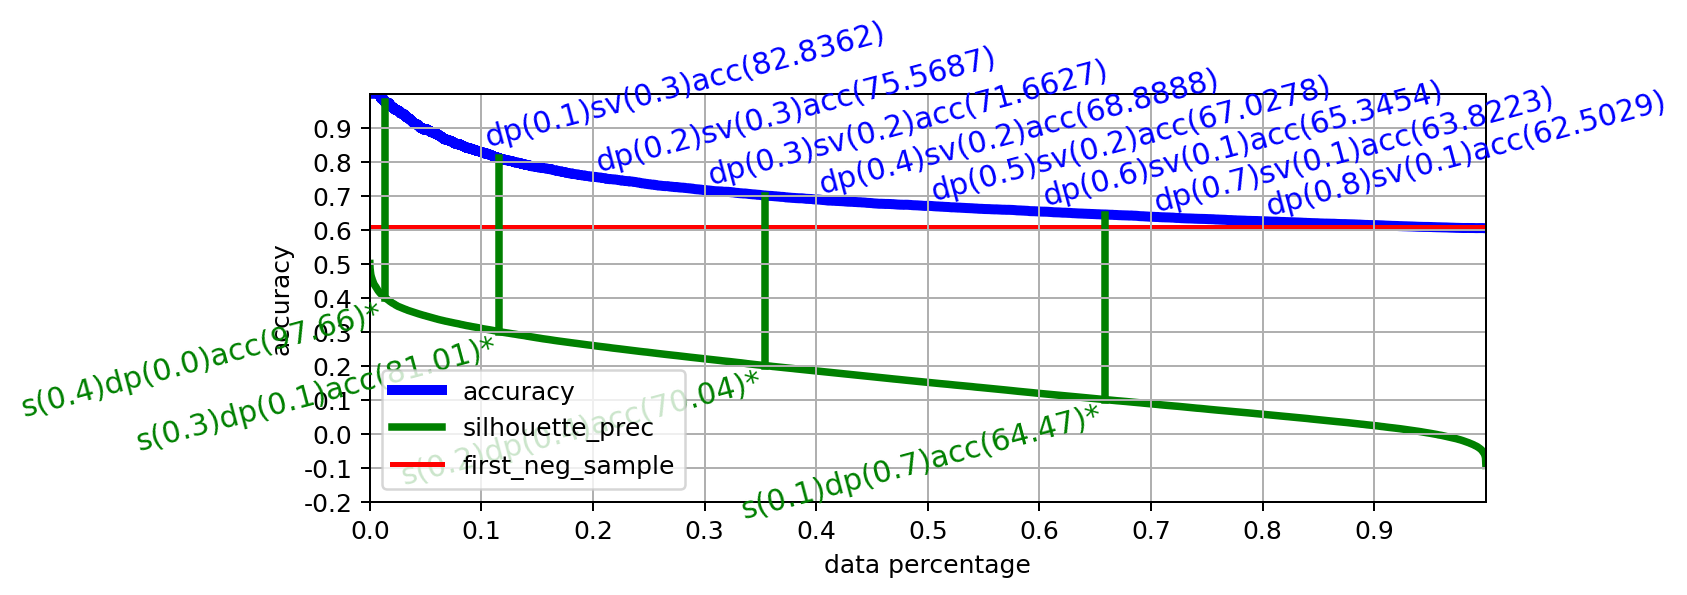

In [79]:
result_dict = funcH.analyze_silhouette_values(_evs["silhouette_values"], _evs["predictions"], _evs["labels"],
                                    centroid_info_pdf=_evs["kluster_centroids"],
                                    label_names=None, conf_plot_save_to='',
                                    figsize=figsize, lw=[4, 3, 2], show_title=False, str_deg=15, str_size=12)
sil_val_sorted, sil_idx = funcH.sortVec(_evs["silhouette_values"])
rec_los_sorted, rec_idx = funcH.sortVec(-_evs["reconstruction_loss"])
rec_los_sorted_0_1 = funcH.map_0_1(-rec_los_sorted)
predictions_mapped = map_predictions(_evs["labels"], _evs["predictions"], centroid_info_pdf=_evs["kluster_centroids"])
print(np.min(rec_los_sorted), np.max(rec_los_sorted))

0.17461997

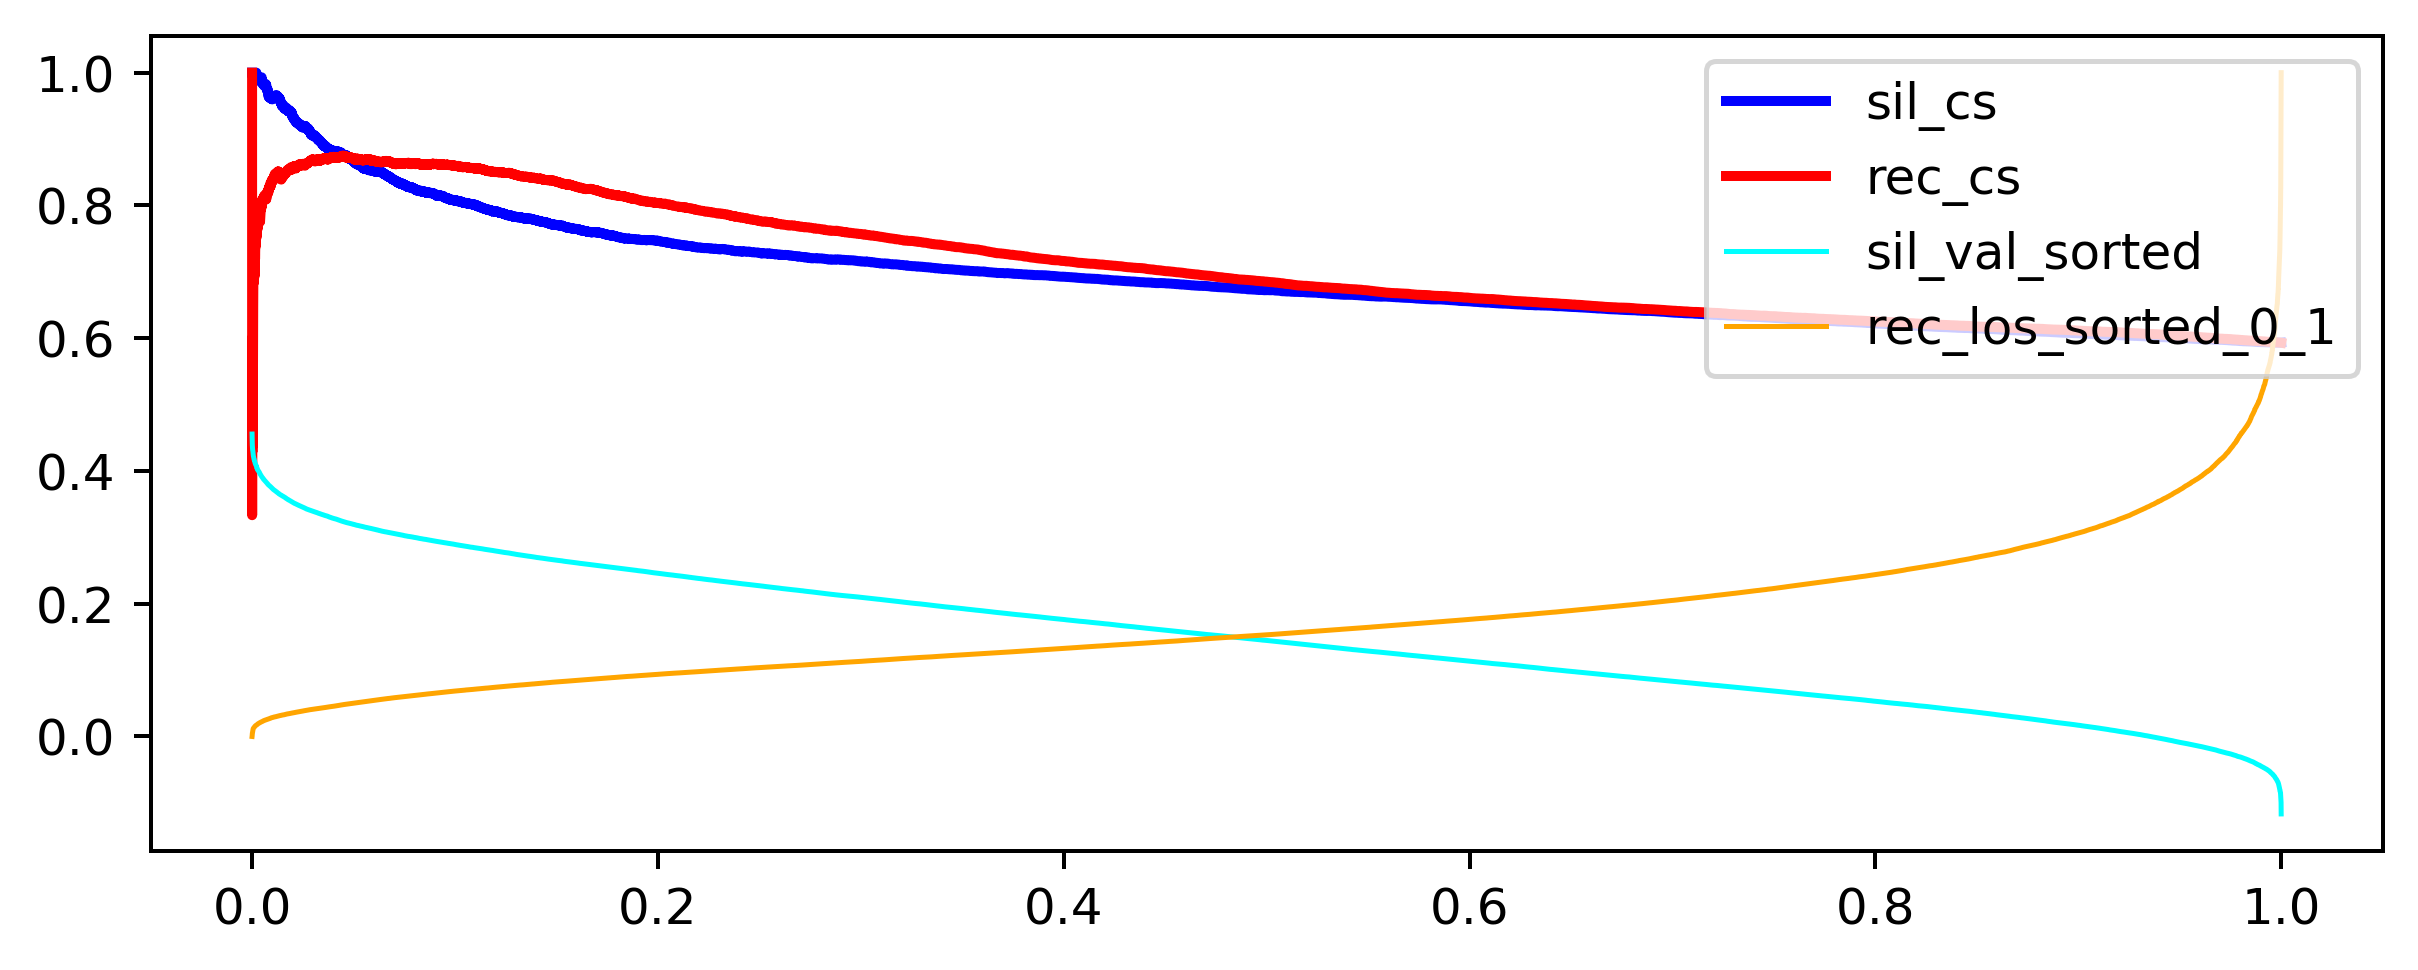

In [72]:
cumsum_preds_sil = _cumsum_preds(labels, predictions_mapped, sil_idx)
cumsum_preds_rec = _cumsum_preds(labels, predictions_mapped, rec_idx)
data_perc_vec = np.arange(0, len(cumsum_preds_rec)) / len(cumsum_preds_rec)

plt.close('all')
fig, ax = plt.subplots(1, figsize=figsize, dpi=dpi)
ax.plot(data_perc_vec, cumsum_preds_sil, lw=2, label='sil_cs', color='blue', ls='-', zorder=0)
ax.plot(data_perc_vec, cumsum_preds_rec, lw=2, label='rec_cs', color='red', ls='-', zorder=0)
ax.plot(data_perc_vec, sil_val_sorted, lw=1, label='sil_val_sorted', color='cyan', ls='-', zorder=0)
ax.plot(data_perc_vec, rec_los_sorted_0_1, lw=1, label='rec_los_sorted_0_1', color='orange', ls='-', zorder=0)
plt.legend(loc='upper right')
np.mean(rec_los_sorted_0_1)

In [110]:
pip install dash

     |████████████████████████████████| 75 kB 266 kB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 337 kB/s eta 0:00:01    |███████████████                 | 6.2 MB 1.8 MB/s eta 0:00:04
     |████████████████████████████████| 1.0 MB 217 kB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 48 kB/s eta 0:00:012
     |████████████████████████████████| 188 kB 582 kB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 450 kB/s eta 0:00:01
     |████████████████████████████████| 357 kB 453 kB/s eta 0:00:01
  Created wheel for dash: filename=dash-1.19.0-py3-none-any.whl size=84011 sha256=29adcb4a0492695893743a17cf57b3ff2f2c12cd65cda5c8fc3e97b42ef76c20
  Stored in directory: /home/doga/.cache/pip/wheels/85/e9/f4/033d9bd19fe04ba8b3b41b6cfaec3c4634e85bdcdd82858ff3
  Created wheel for dash-core-components: filename=dash_core_components-1.15.0-py3-none-any.whl size=3527011 sha256=0f0a52c4134af90e7a48cdeaf62a38dbe6ef9a1880bca7a1aed9a84433bfd5a3
  Stored in direct